In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller

In [57]:
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('data_stocks.csv',header=0, parse_dates=True, index_col='DATE')
df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [58]:
df= df[['NASDAQ.AAPL', 'NASDAQ.ADP', 'NASDAQ.CBOE', 'NASDAQ.CSCO', 'NASDAQ.EBAY']]

In [59]:
df.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1491226260,143.7000,102.1400,81.21,33.8800,33.3950
1491226320,143.6901,102.2125,81.21,33.9000,33.4100
1491226380,143.6400,102.1400,81.13,33.8499,33.3350
1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [60]:
df.isnull().sum().sum()

0

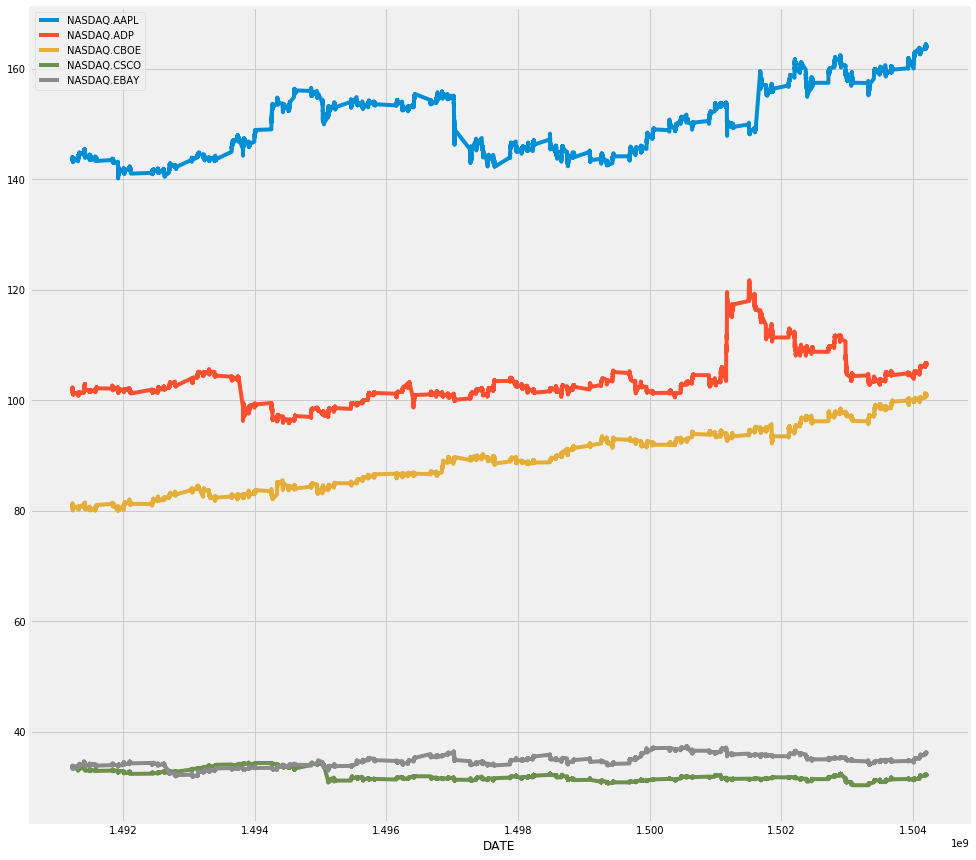

In [61]:
df.plot(figsize=(15,15))
plt.show()

In [62]:
x = df[['NASDAQ.AAPL']]
x.head()

,NASDAQ.AAPL
DATE,
1491226200,143.6800
1491226260,143.7000
1491226320,143.6901
1491226380,143.6400
1491226440,143.6600


In [63]:
x = x.values

In [64]:
size = int(len(x) * 0.95)
print(len(x))
print(size)

41266
39202


In [65]:
train, test = x[0:size], x[size:len(x)]

In [66]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=159.127528, expected=159.081900
predicted=159.085007, expected=159.040000
predicted=159.040902, expected=158.960000
predicted=158.962014, expected=159.036600
predicted=159.038223, expected=159.090000
predicted=159.089026, expected=159.080000
predicted=159.081387, expected=159.100000
predicted=159.099546, expected=159.080000
predicted=159.079214, expected=159.250000
predicted=159.249390, expected=159.238900
predicted=159.236221, expected=159.250000
predicted=159.251654, expected=159.260000
predicted=159.257349, expected=159.300000
predicted=159.299857, expected=159.280000
predicted=159.279828, expected=159.240000
predicted=159.241122, expected=159.230000
predicted=159.230387, expected=159.230000
predicted=159.230632, expected=159.290000
predicted=159.290505, expected=159.220000
predicted=159.220287, expected=159.220600
predicted=159.222472, expected=159.320000
predicted=159.318176, expected=159.380000
predicted=159.379294, expected=159.340000
predicted=159.340401, expected=159

predicted=160.039198, expected=160.010000
predicted=160.009109, expected=159.970000
predicted=159.971292, expected=159.950000
predicted=159.949943, expected=159.770000
predicted=159.772583, expected=159.640000
predicted=159.645193, expected=159.630000
predicted=159.632126, expected=159.540000
predicted=159.543706, expected=159.425800
predicted=159.431040, expected=159.470000
predicted=159.471777, expected=159.370000
predicted=159.371452, expected=159.480000
predicted=159.483332, expected=159.469000
predicted=159.466551, expected=159.530000
predicted=159.532238, expected=159.540000
predicted=159.537555, expected=159.630100
predicted=159.629919, expected=159.610000
predicted=159.608159, expected=159.500000
predicted=159.501972, expected=159.500000
predicted=159.500644, expected=159.510000
predicted=159.509968, expected=159.490000
predicted=159.492270, expected=159.580000
predicted=159.580136, expected=159.650000
predicted=159.648023, expected=159.690800
predicted=159.690486, expected=159

predicted=160.070825, expected=160.110000
predicted=160.109709, expected=160.120000
predicted=160.119590, expected=160.100000
predicted=160.100561, expected=160.130000
predicted=160.129892, expected=160.214500
predicted=160.213344, expected=160.170000
predicted=160.169876, expected=160.158000
predicted=160.159276, expected=160.170000
predicted=160.168877, expected=160.230000
predicted=160.230247, expected=160.220000
predicted=160.219820, expected=160.300000
predicted=160.300016, expected=160.300000
predicted=160.298035, expected=160.330000
predicted=160.330677, expected=160.274000
predicted=160.273144, expected=160.190000
predicted=160.192201, expected=160.210000
predicted=160.210891, expected=160.180000
predicted=160.180800, expected=160.210000
predicted=160.212214, expected=160.230000
predicted=160.229363, expected=160.210000
predicted=160.210899, expected=160.110000
predicted=160.111327, expected=160.080000
predicted=160.081927, expected=160.065000
predicted=160.065849, expected=160

predicted=161.760238, expected=161.760000
predicted=161.759594, expected=161.780000
predicted=161.781676, expected=161.810000
predicted=161.809064, expected=161.930000
predicted=161.928967, expected=161.890000
predicted=161.888604, expected=161.853500
predicted=161.855152, expected=161.900000
predicted=161.898531, expected=161.890000
predicted=161.890052, expected=161.838800
predicted=161.840780, expected=161.825500
predicted=161.826218, expected=161.810000
predicted=161.810653, expected=161.850000
predicted=161.851146, expected=161.870000
predicted=161.869795, expected=161.860000
predicted=161.860703, expected=161.945000
predicted=161.944404, expected=161.950000
predicted=161.948545, expected=161.900000
predicted=161.901437, expected=161.920000
predicted=161.919851, expected=161.980000
predicted=161.979149, expected=161.954500
predicted=161.955064, expected=161.975000
predicted=161.975818, expected=161.975600
predicted=161.974595, expected=161.900000
predicted=161.901572, expected=161

predicted=161.591423, expected=161.605000
predicted=161.605097, expected=161.610000
predicted=161.609918, expected=161.545000
predicted=161.545636, expected=161.560000
predicted=161.561243, expected=161.490000
predicted=161.490350, expected=161.520000
predicted=161.522521, expected=161.550000
predicted=161.549137, expected=161.520000
predicted=161.521473, expected=161.500100
predicted=161.501029, expected=161.550000
predicted=161.549688, expected=161.618300
predicted=161.617643, expected=161.640000
predicted=161.639737, expected=161.580000
predicted=161.580222, expected=161.575000
predicted=161.575511, expected=161.550000
predicted=161.549999, expected=161.550000
predicted=161.551796, expected=161.570000
predicted=161.570306, expected=161.490300
predicted=161.491514, expected=161.490000
predicted=161.491980, expected=161.510000
predicted=161.509529, expected=161.500000
predicted=161.501449, expected=161.500000
predicted=161.500850, expected=161.430000
predicted=161.430693, expected=161

predicted=162.201939, expected=162.110000
predicted=162.112079, expected=162.200000
predicted=162.201025, expected=162.310000
predicted=162.307497, expected=162.224000
predicted=162.225294, expected=162.240000
predicted=162.241010, expected=162.280000
predicted=162.277498, expected=162.360000
predicted=162.360263, expected=162.325500
predicted=162.325066, expected=162.390000
predicted=162.390132, expected=162.580000
predicted=162.576074, expected=162.600000
predicted=162.597775, expected=162.705000
predicted=162.704057, expected=162.750000
predicted=162.745236, expected=162.710000
predicted=162.709887, expected=162.690000
predicted=162.689842, expected=162.760000
predicted=162.759048, expected=162.740000
predicted=162.739961, expected=162.750000
predicted=162.751454, expected=162.720000
predicted=162.719445, expected=162.694900
predicted=162.696355, expected=162.730000
predicted=162.730325, expected=162.750000
predicted=162.750057, expected=162.760000
predicted=162.760683, expected=162

predicted=162.506111, expected=162.420000
predicted=162.420848, expected=162.520000
predicted=162.520790, expected=162.500000
predicted=162.498835, expected=162.500000
predicted=162.502666, expected=162.523000
predicted=162.521770, expected=162.490000
predicted=162.490511, expected=162.500000
predicted=162.501096, expected=162.496800
predicted=162.496629, expected=162.500000
predicted=162.501028, expected=162.500000
predicted=162.500329, expected=162.490000
predicted=162.490624, expected=162.480000
predicted=162.480706, expected=162.470000
predicted=162.470696, expected=162.540000
predicted=162.540094, expected=162.480000
predicted=162.480014, expected=162.455300
predicted=162.457539, expected=162.480000
predicted=162.479297, expected=162.475000
predicted=162.475801, expected=162.470000
predicted=162.471255, expected=162.485000
predicted=162.485063, expected=162.470000
predicted=162.470377, expected=162.480000
predicted=162.480801, expected=162.520000
predicted=162.519633, expected=162

predicted=163.250856, expected=163.316200
predicted=163.315192, expected=163.300000
predicted=163.300870, expected=163.290000
predicted=163.290991, expected=163.270000
predicted=163.269701, expected=163.250000
predicted=163.251045, expected=163.360000
predicted=163.359876, expected=163.390000
predicted=163.388534, expected=163.260000
predicted=163.262128, expected=163.145000
predicted=163.147429, expected=163.078800
predicted=163.080588, expected=163.130000
predicted=163.132545, expected=163.085000
predicted=163.086919, expected=162.909700
predicted=162.914300, expected=162.920000
predicted=162.922687, expected=162.965000
predicted=162.964621, expected=163.000000
predicted=163.002215, expected=163.020000
predicted=163.020262, expected=162.960000
predicted=162.960173, expected=162.910000
predicted=162.911458, expected=162.941400
predicted=162.941787, expected=163.030000
predicted=163.029706, expected=163.025000
predicted=163.025070, expected=162.990000
predicted=162.990990, expected=163

predicted=163.370695, expected=163.310000
predicted=163.309597, expected=163.283400
predicted=163.285402, expected=163.310000
predicted=163.309275, expected=163.300000
predicted=163.300689, expected=163.324000
predicted=163.325150, expected=163.380000
predicted=163.379166, expected=163.460000
predicted=163.458903, expected=163.440000
predicted=163.439213, expected=163.420000
predicted=163.420467, expected=163.430000
predicted=163.429272, expected=163.430000
predicted=163.430290, expected=163.480000
predicted=163.480421, expected=163.420000
predicted=163.420137, expected=163.424400
predicted=163.426093, expected=163.430000
predicted=163.429353, expected=163.430000
predicted=163.431177, expected=163.413600
predicted=163.414417, expected=163.400000
predicted=163.400826, expected=163.380000
predicted=163.380851, expected=163.385000
predicted=163.385994, expected=163.385000
predicted=163.385589, expected=163.410000
predicted=163.410625, expected=163.380100
predicted=163.380451, expected=163

predicted=163.749402, expected=163.610000
predicted=163.612712, expected=163.710000
predicted=163.711828, expected=163.710000
predicted=163.707172, expected=163.790000
predicted=163.792034, expected=163.789900
predicted=163.787978, expected=163.796200
predicted=163.796675, expected=163.810000
predicted=163.809091, expected=163.860000
predicted=163.859524, expected=163.900000
predicted=163.899181, expected=163.925000
predicted=163.924545, expected=163.900000
predicted=163.899719, expected=163.945000
predicted=163.944876, expected=163.932400
predicted=163.931620, expected=163.900000
predicted=163.901550, expected=163.890000
predicted=163.890568, expected=163.910000
predicted=163.910381, expected=163.925000
predicted=163.925473, expected=163.885000
predicted=163.885989, expected=163.870000
predicted=163.871194, expected=163.874900
predicted=163.875169, expected=163.850000
predicted=163.851140, expected=163.830000
predicted=163.831536, expected=163.820000
predicted=163.820839, expected=163

predicted=163.880127, expected=163.910000
predicted=163.908672, expected=163.880000
predicted=163.880335, expected=163.870000
predicted=163.870469, expected=163.850000
predicted=163.850125, expected=163.800000
predicted=163.801665, expected=163.807500
predicted=163.808993, expected=163.850000
predicted=163.850034, expected=163.840000
predicted=163.840676, expected=163.820000
predicted=163.821158, expected=163.835000
predicted=163.835028, expected=163.830000
predicted=163.830193, expected=163.786300
predicted=163.787740, expected=163.846200
predicted=163.846717, expected=163.860000
predicted=163.859104, expected=163.910000
predicted=163.910683, expected=163.900000
predicted=163.899058, expected=163.915000
predicted=163.915361, expected=163.830000
predicted=163.830285, expected=163.910000
predicted=163.911267, expected=163.910000
predicted=163.908491, expected=163.889900
predicted=163.892169, expected=163.860000
predicted=163.860318, expected=163.920000
predicted=163.920062, expected=163

NameError: name 'mean_squared_error' is not defined

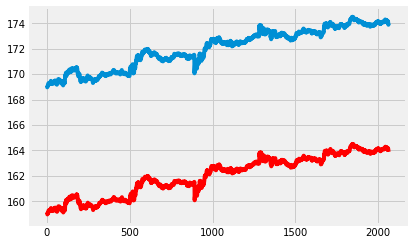

In [70]:
plt.plot(test+10)
plt.plot(predictions, color='red')
plt.show()